<h1 align='center'>INN Hotels Group Problem Summary 🏨</h1>

<h1> Problem Statement Summary </h1>
    <LI>Business Context: INN Hotels wants to reduce revenue loss from last-minute booking cancellations.</LI>
    <LI>Goal: Predict cancellations in advance using guest and booking details.</LI>
    <LI>Approach: Use classification models on historical booking data.</LI>
    <LI>Impact: Enables better room allocation, pricing strategy, and inventory forecasting.</LI>

# Leading Question:

1.	What is the average room price?
2.	How do cancellations vary by market segment type as well as by lead time?
3.	Using 70% of the data for training the model, build a logistic regression model for predicting booking cancellations.
4.	From the coefficients of this model, what can you infer about the relationship between key variables and cancellations.
5.	What is the model accuracy, precision, and recall?
6.	What recommendations would you make to the management of the hotel as a data scientist based on your data analysis and predictive model (as related to cancellations)?

# Data Loading

In [5]:
# Import libraries
import pandas as pd
import numpy as np

In [6]:
# Load dataset
df = pd.read_csv('INNHotelsGroup.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


# Libraries

In [8]:
# Warning filter
import warnings
warnings.filterwarnings("ignore")

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical libraries
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Prediction libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
    roc_auc_score,
    roc_curve,
)
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
%matplotlib inline

In [9]:
# Disable display column & row limits
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 250)

# Data Overview
<li>No Duplicates</li>
<li>No Null Values</li>
<li>Shape: (36275, 19)</li>

In [11]:
# check for duplicate values
data = df
data[data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [12]:
# Check for missing values
df.isnull().sum() #Great No Null Values

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [13]:
# Descriptive stats
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


<h1>Insights From Descriptive Stats</h1>

<table border="1" cellpadding="5" cellspacing="0" style="border-collapse: collapse; width: 100%;">
  <thead>
    <tr>
      <th>Feature</th>
      <th>Mean</th>
      <th>Min</th>
      <th>Max</th>
      <th>Quick Insight</th>
    </tr>
  </thead>
  <tbody>
    <tr><td>No_of_adults</td><td>1.84</td><td>0</td><td>4</td><td>Mostly 1-2 adults per booking</td></tr>
    <tr><td>No_of_children</td><td>0.10</td><td>0</td><td>10</td><td>Mostly no kids; some large groups</td></tr>
    <tr><td>No_of_weekend_nights</td><td>0.81</td><td>0</td><td>7</td><td>Weekend stays usually short</td></tr>
    <tr><td>No_of_week_nights</td><td>2.20</td><td>0</td><td>17</td><td>Weekday stays mostly 2-3 nights</td></tr>
    <tr><td>Required_car_parking_space</td><td>0.03</td><td>0</td><td>1</td><td>Few need parking</td></tr>
    <tr><td>Lead_time (days)</td><td>85.23</td><td>0</td><td>443</td><td>Bookings made ~3 months ahead</td></tr>
    <tr><td>Arrival_year</td><td>2017.82</td><td>2017</td><td>2018</td><td>Data from 2 years only</td></tr>
    <tr><td>Arrival_month</td><td>7.42</td><td>1</td><td>12</td><td>Peak bookings mid-year (July)</td></tr>
    <tr><td>Arrival_date</td><td>15.6</td><td>1</td><td>31</td><td>Mid-month arrivals</td></tr>
    <tr><td>Repeated_guest</td><td>0.025</td><td>0</td><td>1</td><td>Only ~2.5% repeat guests</td></tr>
    <tr><td>No_of_previous_cancellations</td><td>0.023</td><td>0</td><td>13</td><td>Most guests no prior cancellations</td></tr>
    <tr><td>No_of_previous_bookings_not_canceled</td><td>0.15</td><td>0</td><td>58</td><td>Few prior successful bookings</td></tr>
    <tr><td>Avg_price_per_room (Euros)</td><td>103.42</td><td>0</td><td>540</td><td>Wide range in room pricing</td></tr>
    <tr><td>No_of_special_requests</td><td>0.62</td><td>0</td><td>5</td><td>Most guests make no or 1 request</td></tr>
  </tbody>
</table>

<br>

<h3>Quick Bullets Summary</h3>
<ol>
  <li>Most bookings are for <b>1-2 adults</b>,We will have to check for 0 Adults.</li>
  <li>Majority of the bookings made by couples do not include children; but here are a few cases with 9/10 Kids (probably outliers)</li>
  <li>Weekend stays tend to be <b>short, ≤ 2 nights</b>, Weekday stays average around <b>2-3 nights</b>, maxing at 17 nights.</li>
  <li>Only <b>3% need parking</b>, so demand is low.</li>
  <li>Guests book on average <b>3 months ahead</b> but with large variance.</li>
  <li>Most arrivals happen <b>mid-month (15-16th)</b>.</li>
  <li>Repeat guests are rare (~2.5%).</li>
  <li>Prior cancellations are rare; most guests have none.</li>
  <li>Room prices vary widely, from free/0 to 540 Euros.</li>
</ol>

<h1>Checking for Anomalies in Bookings</h1>

<h4>1. Rooms With 0 Adults : Bookings with 0 adults don’t make practical sense for a hotel booking — these could be data entry errors.

In [17]:
zero_adults = df[df['no_of_adults'] == 0]
print(f"Number of bookings with 0 adults: {len(zero_adults)}")

Number of bookings with 0 adults: 139


<h4>2. Bookings With More Than 4 Children : Bookings with more than 4 children might be outliers</h4>

In [19]:
high_children = df[df['no_of_children'] > 4]
print(f"Number of bookings with more than 4 children: {len(high_children)}")

Number of bookings with more than 4 children: 3


<h4>Removing the anomalies

In [21]:
# Remove bookings with 0 adults
df = df[df['no_of_adults'] != 0]

# Remove bookings with more than 4 children
df = df[df['no_of_children'] <= 4]

# Reset index
df = df.reset_index(drop=True)

# Exploratory Data Analysis (EDA)

1. Cancellation Distribution

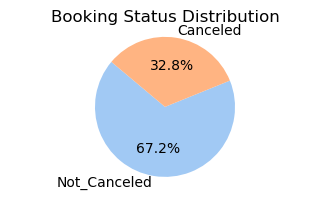

In [24]:
# Distribution of cancellations
booking_counts = df['booking_status'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4,2))
plt.pie(
    booking_counts,
    labels=booking_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette("pastel")  # optional for pretty colors
)

plt.title('Booking Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle
plt.show()

**Insight:**  
Roughly 33% of bookings are canceled.


2. Cancellation by Lead Time


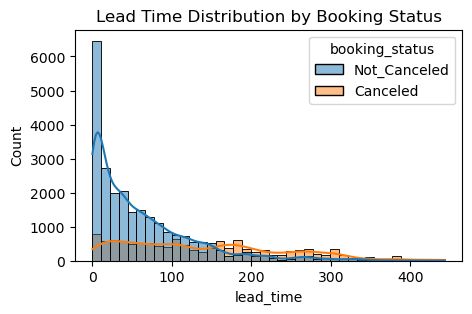

In [27]:
# Distribution of lead time for canceled vs. non-canceled bookings
plt.figure(figsize=(5,3))
sns.histplot(data=df, x='lead_time', hue='booking_status', bins=40, kde=True)
plt.title('Lead Time Distribution by Booking Status')
plt.show()

**Insight:**  
Longer lead times are associated with higher cancellation rates. Guests who book far in advance may cancel more often due to changing plans. Consider stricter policies or follow-ups for long-lead bookings.

3. Market Segment & Cancellation Rates


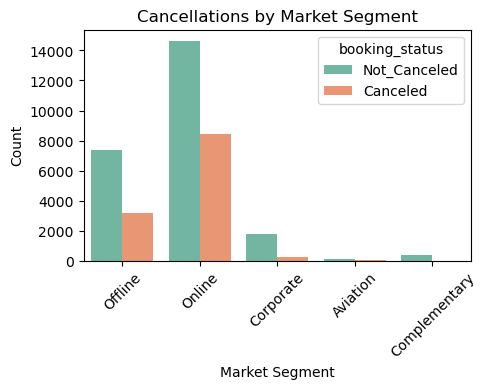

In [30]:
# Market segment vs cancellation
plt.figure(figsize=(5,3))
sns.countplot(data=df, x='market_segment_type', hue='booking_status', palette='Set2')
plt.title('Cancellations by Market Segment')
plt.xticks(rotation=45)
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()

**Insight:**  
Online bookings have higher cancellation counts.

4. Percentage based on Marking Segment 

In [33]:
# Group by market_segment_type and booking_status
segment_cancel = df.groupby(['market_segment_type', 'booking_status']).size().unstack(fill_value=0)

# Calculate cancellation percentage per segment
segment_cancel['Total'] = segment_cancel.sum(axis=1)
segment_cancel['Cancellation %'] = (segment_cancel['Canceled'] / segment_cancel['Total']) * 100

segment_cancel.reset_index(inplace=True)
segment_cancel

booking_status,market_segment_type,Canceled,Not_Canceled,Total,Cancellation %
0,Aviation,37,88,125,29.600000
1,Complementary,0,387,387,0.000000
2,Corporate,220,1796,2016,10.912698
3,Offline,3153,7374,10527,29.951553
4,Online,8430,14648,23078,36.528295


**Insights:**
    <li>Online bookings have the highest cancellation rate (~36.5%), indicating more last-minute changes or less commitment from online customers</li>
    <li>Offline and Aviation segments both show similar cancellation rates around 30%</li>
    <li>Corporate bookings are the most stable, with only ~11% cancellations, reflecting business travelers' reliability. </li>
    <li>Complementary bookings have 0% cancellations, likely because they are promotions or special offers.</li>
    <li>The high cancellation rate in online and offline channels suggests potential for improving customer engagement or flexible booking policies to reduce cancellations.</li>


4. Average Price Paid per room Type Reserved

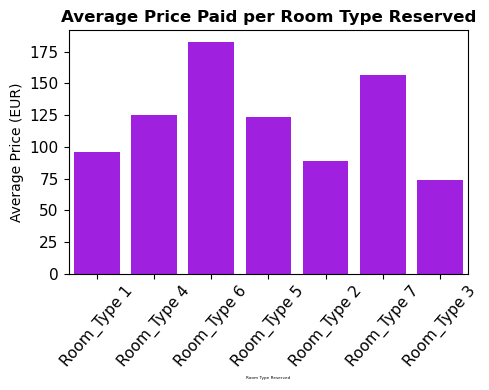

In [36]:
# Avg price based on room type
plt.figure(figsize=(5, 4))
sns.set_palette(['#aa00ff'])  # Vibrant color palette

sns.barplot(x='room_type_reserved', y='avg_price_per_room', data=df, errorbar=None)

plt.title('Average Price Paid per Room Type Reserved', fontsize=12, fontweight='bold')  # Neon pink
plt.xlabel('Room Type Reserved', fontsize=3)
plt.ylabel('Average Price (EUR)', fontsize=10)
plt.xticks(rotation=49, fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

**Insight:**  
Room Type 6 hs the heighest Avg Price followed by room type 7 & 5 

6. Cancellations based on Special Requests

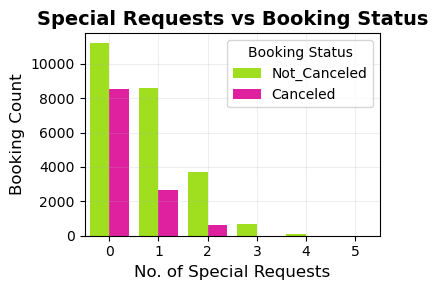

In [39]:
plt.figure(figsize=(4, 3))
sns.countplot(data=df, x='no_of_special_requests', hue='booking_status',
              palette=['#aaff00', '#ff00aa'])  # Vibrant yellow & neon green
plt.title('Special Requests vs Booking Status', fontsize=14, fontweight='bold')
plt.xlabel('No. of Special Requests', fontsize=12)
plt.ylabel('Booking Count', fontsize=12)
plt.legend(title='Booking Status')
plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()

**Insight:**  
Customers who opt for Special requests are less likely to cancel bookings

7. Lead Time Distribution & Cancellation Status

In [42]:
# Let's create Bins
bins = [0, 15, 30, 45, 60, 90, 120, 180, float('inf')]

# Define bin labels
labels = ['0-15', '15-30', '30-45', '45-60', '60-90', '90-120', '120-180', '180+']

# Create a new column with binned lead times
df['lead_time_bin'] = pd.cut(df['lead_time'], bins=bins, labels=labels, right=False)

# Group by lead_time_bin and booking_status to get counts
lead_time_cancel_stats = df.groupby(['lead_time_bin', 'booking_status']).size().unstack(fill_value=0)

# Rename columns for clarity
lead_time_cancel_stats.columns = ['Canceled', 'Not_Canceled']
lead_time_cancel_stats

# Add a total column
lead_time_cancel_stats['Total'] = lead_time_cancel_stats['Canceled'] + lead_time_cancel_stats['Not_Canceled']

# Calculate percentage of cancellations
lead_time_cancel_stats['Cancellation %'] = (lead_time_cancel_stats['Canceled'] / lead_time_cancel_stats['Total']) * 100

# Round for cleaner display
lead_time_cancel_stats = lead_time_cancel_stats.round(2)
lead_time_cancel_stats

,Canceled,Not_Canceled,Total,Cancellation %
lead_time_bin,,,,
0-15,921,7439,8360,11.02
15-30,786,2975,3761,20.90
30-45,803,2826,3629,22.13
45-60,662,2059,2721,24.33
60-90,1285,3293,4578,28.07
90-120,1391,2115,3506,39.67
120-180,2032,2174,4206,48.31
180+,3960,1412,5372,73.72


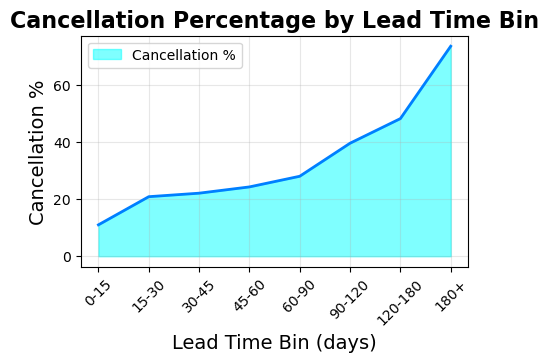

In [43]:
plt.figure(figsize=(5,3))
plt.fill_between(
    lead_time_cancel_stats.index, 
    lead_time_cancel_stats['Cancellation %'], 
    color='#00FFFF',  # Neon Cyan fill
    alpha=0.5,
    label='Cancellation %'
)
plt.plot(
    lead_time_cancel_stats.index, 
    lead_time_cancel_stats['Cancellation %'], 
    color='#007FFF',  # Bright Blue line
    linewidth=2
)

plt.title('Cancellation Percentage by Lead Time Bin', fontsize=16, fontweight='bold')
plt.xlabel('Lead Time Bin (days)', fontsize=14)
plt.ylabel('Cancellation %', fontsize=14)
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

**Insight :** <br>
So while it's not a perfectly linear relationship, the trend is clear: <br>
Longer lead time → Higher cancellation risk

# Seasonality Variations 

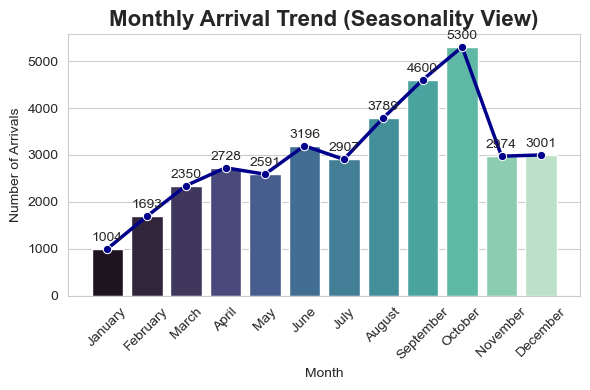

In [46]:
# Mapping numeric months to names
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

# Apply mapping
df['arrival_month_name'] = df['arrival_month'].map(month_map)

# Sort months in calendar order
month_order = list(month_map.values())

# Count bookings per month
monthly_counts = df['arrival_month_name'].value_counts().reindex(month_order)

# Set style and palette
sns.set_style("whitegrid")
colors = sns.color_palette("Set2")

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, palette="mako")

# Add line trend
sns.lineplot(
    x=monthly_counts.index,
    y=monthly_counts.values,
    marker='o',
    color='darkblue',
    linewidth=2.5
)

# Add data labels
for i, value in enumerate(monthly_counts.values):
    plt.text(i, value + max(monthly_counts.values)*0.02, str(value), ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Monthly Arrival Trend (Seasonality View)', fontsize=16, weight='bold')
plt.ylabel('Number of Arrivals')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Inshight :** <br>
August - September - October are the peak months with the heighest bookings

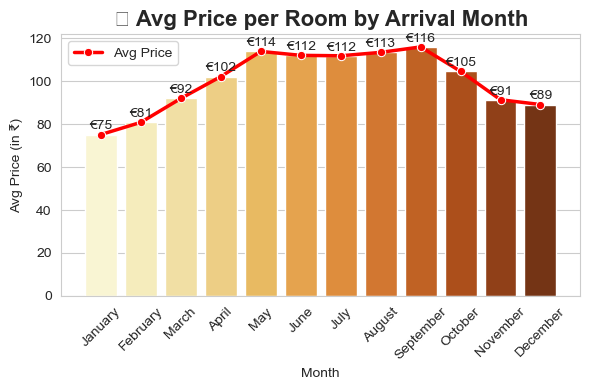

In [48]:
# Group by month and calculate average price
avg_price_by_month = df.groupby('arrival_month_name')['avg_price_per_room'].mean().reindex(month_order)

# Plotting
plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
colors = sns.color_palette("YlOrBr", 12)  # Warm colors for pricing

# Bar plot
sns.barplot(x=avg_price_by_month.index, y=avg_price_by_month.values, palette=colors)

# Line trend
sns.lineplot(
    x=avg_price_by_month.index,
    y=avg_price_by_month.values,
    marker='o',
    color='red',
    linewidth=2.5,
    label='Avg Price'
)

# Add price labels
for i, value in enumerate(avg_price_by_month.values):
    plt.text(i, value + 1, f'€{value:.0f}', ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('💸 Avg Price per Room by Arrival Month', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Avg Price (in ₹)')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Inisght :** <br> 
Even though we have etablished that some months are busier than others, there is **not a** huge difference between the avg room price for those months and the others 

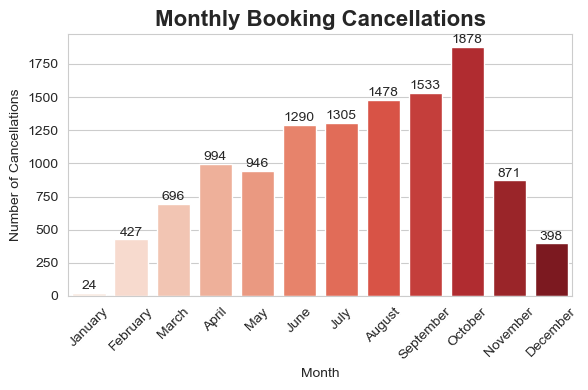

In [50]:
# Let's check if cancellations happen more in some months than others 
canceled_df = df[df['booking_status'].str.lower().isin(['canceled', 'not confirmed'])]
cancel_counts = canceled_df['arrival_month_name'].value_counts().reindex(month_order)
plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
cancel_colors = sns.color_palette("Reds", 12)
sns.barplot(x=cancel_counts.index, y=cancel_counts.values, palette=cancel_colors)
# Add value labels
for i, value in enumerate(cancel_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom', fontsize=10)

# Title and labels
plt.title('Monthly Booking Cancellations', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Number of Cancellations')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight :** <br>
The Cancellations are also high in the same months August - October 

# Encoding
Although I tried ordinal encoding for for these variables , I observed that model learns these variables way better when they are nominally encoded.

In [53]:
# Here we go
df = pd.get_dummies(df, columns=['market_segment_type' , 'room_type_reserved' , 'type_of_meal_plan' ], drop_first=True)  

In [54]:
# Binary encoding of our target variable
booking_mapping = {
    'Canceled': 0,
    'Not_Canceled': 1
}
df['booking_status_encoded'] = df['booking_status'].map(booking_mapping)

# Correlation

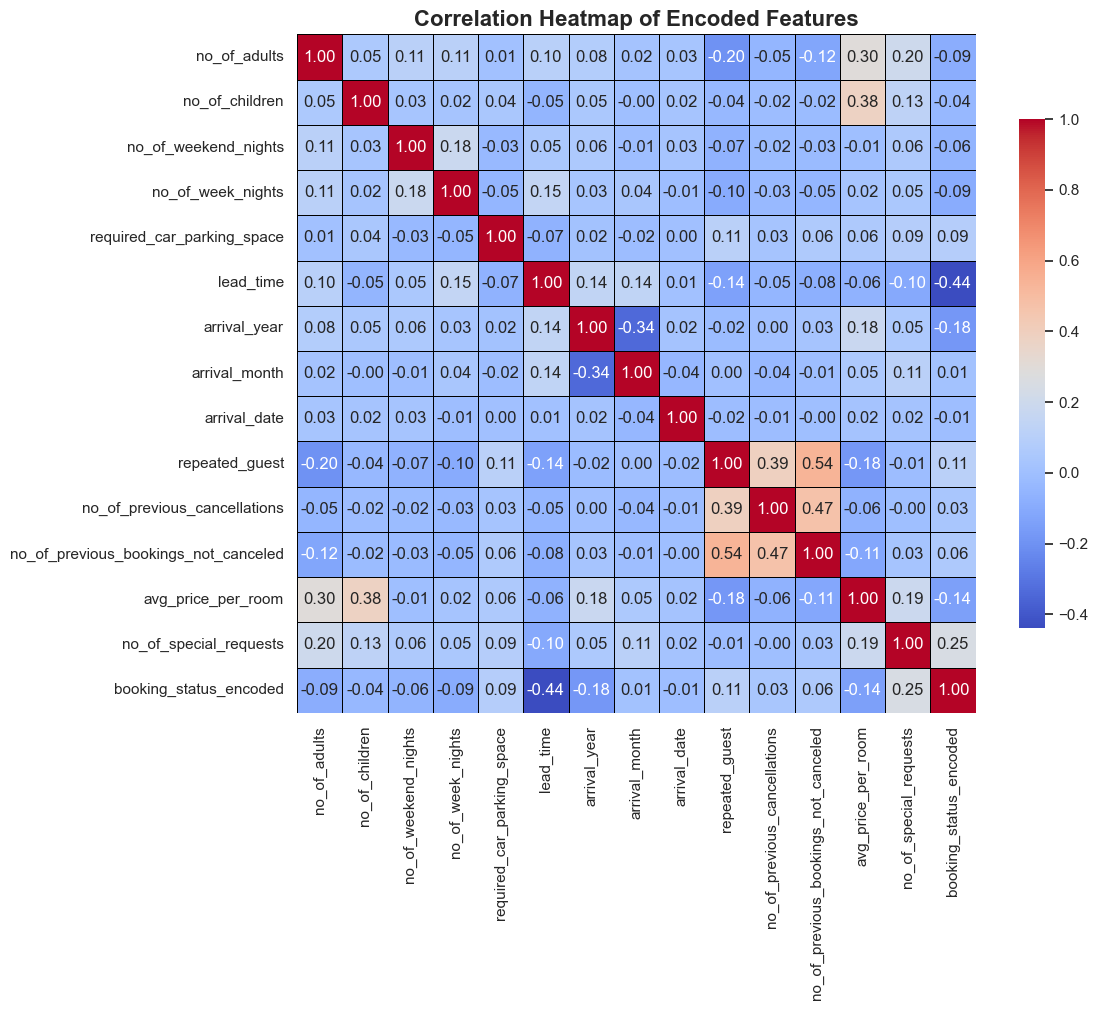

In [56]:
# Select only numeric columns (important for correlation)
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure
plt.figure(figsize=(12,10))
sns.set(style="white")

# Define a vibrant colormap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, 
            linewidths=0.5, linecolor='black', square=True, cbar_kws={"shrink": .75})

# Add title
plt.title('Correlation Heatmap of Encoded Features', fontsize=16, weight='bold')

# Show plot
plt.tight_layout()
plt.show()

# Model Building
Steps: Build a Logistic Regression Model (70% Train Data)

1. Encode necessary variables (already done earlier).
2. Split the dataset.
3. Train a logistic regression model.

In [58]:
# Step 1: Feature matrix and target
X = df.drop(columns=['Booking_ID', 'booking_status' ,'booking_status_encoded'  ,  'lead_time_bin' ,
                     'arrival_year', 'arrival_date' , 'no_of_children' , 'required_car_parking_space' , 'arrival_month' , 
                     'no_of_previous_cancellations' , 'arrival_month_name']) 
y = df['booking_status_encoded']  

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=223, stratify=y)

# Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train Logistic Regression
logreg = LogisticRegression(max_iter=2500)
logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=2500)

In [59]:
# Step 5: Evaluate
y_pred = logreg.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.63      0.68      3552
           1       0.83      0.89      0.86      7288

    accuracy                           0.80     10840
   macro avg       0.78      0.76      0.77     10840
weighted avg       0.80      0.80      0.80     10840



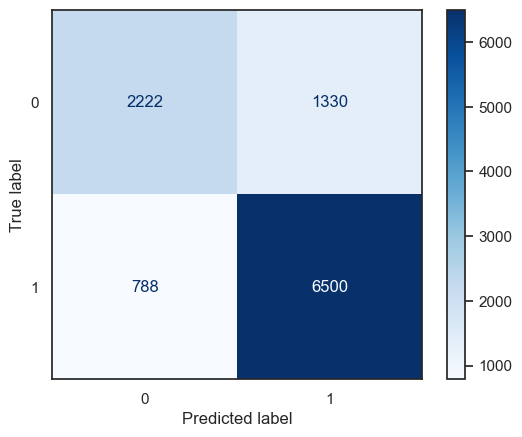

In [60]:
# Display Confusion Matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_scaled, y_test, cmap="Blues")

In [61]:
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall    = recall_score(y_test, y_pred)

# Create the metrics summary table
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [accuracy, precision, recall]
})

# Round the scores for cleaner display
metrics_df['Score'] = metrics_df['Score'].round(3)

# Display the table
metrics_df

,Metric,Score
0,Accuracy,0.805
1,Precision,0.830
2,Recall,0.892


In [62]:
# Sorted coefficient table (feature importance sign & size)
coef_df = (
    pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})
      .sort_values(by='Coefficient', ascending=False)
)

print('\nTop positive & negative drivers of cancellation:\n')
display(coef_df.head(10))      # most positive → increase chance of NOT‑cancelling


Top positive & negative drivers of cancellation:



,Feature,Coefficient
7,no_of_special_requests,1.189317
8,market_segment_type_Complementary,0.801344
10,market_segment_type_Offline,0.737807
4,repeated_guest,0.275917
9,market_segment_type_Corporate,0.195781
16,room_type_reserved_Room_Type 6,0.122632
14,room_type_reserved_Room_Type 4,0.080642
17,room_type_reserved_Room_Type 7,0.072199
15,room_type_reserved_Room_Type 5,0.070996
12,room_type_reserved_Room_Type 2,0.061517


In [63]:
display(coef_df.tail(10))      # most negative → increase chance of cancelling

,Feature,Coefficient
13,room_type_reserved_Room_Type 3,0.001738
18,type_of_meal_plan_Meal Plan 2,-0.021489
0,no_of_adults,-0.025212
2,no_of_week_nights,-0.046118
19,type_of_meal_plan_Meal Plan 3,-0.067910
11,market_segment_type_Online,-0.085186
20,type_of_meal_plan_Not Selected,-0.092325
1,no_of_weekend_nights,-0.121938
6,avg_price_per_room,-0.637908
3,lead_time,-1.341379


In [64]:
coef_df.to_csv(r'C:\Users\bhavy\Documents\PROJECTS\Projects\American Express\Coef.csv')

# AUC - ROC Curve

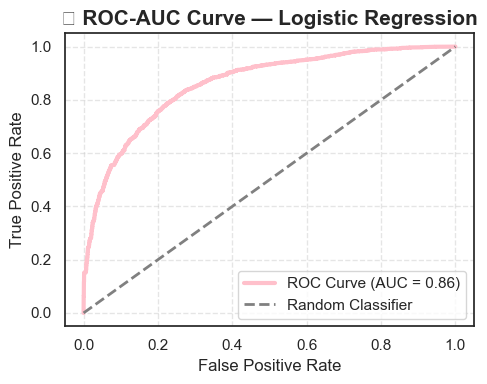

In [66]:
# AUC ROC Curve
# Step 1: Predict class probabilities for the positive class (1)
y_probs = logreg.predict_proba(X_test_scaled)[:, 1]

# Step 2: Calculate FPR, TPR and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Step 3: Plot the ROC curve
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='pink', lw=3, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--', label='Random Classifier')

# Customize the plot
plt.title('💡 ROC-AUC Curve — Logistic Regression', fontsize=15, weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

ROC-AUC Interpretation:
1. The ROC curve shows the trade-off between the true positive rate and false positive rate.
2. **AUC (Area Under Curve) = 0.86** indicates excellent model performance.
3. The model can distinguish between canceled and non-canceled bookings 86% of the time.
4. This model performs significantly better than random guessing (AUC = 0.5).

# Precision - Recall Curve

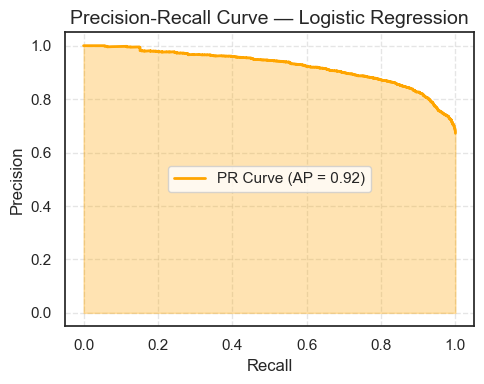

In [69]:
from sklearn.metrics import precision_recall_curve, average_precision_score
# Predict probabilities
y_scores = logreg.predict_proba(X_test_scaled)[:, 1]

# Get precision and recall values
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot
plt.figure(figsize=(5,4))
plt.plot(recall, precision, color='orange', lw=2, label=f'PR Curve (AP = {avg_precision:.2f})')
plt.fill_between(recall, precision, alpha=0.3, color='orange')
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision-Recall Curve — Logistic Regression", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Precision - Recall Interpretation: 
1. **High Area = Excellent Model** <br>
The AP score of 0.92 indicates our model performs extremely well at distinguishing cancellations from non-cancellations.

2. **Consistently High Precision** <br>
The curve stays near the top for most recall values — meanin
Even as we try to catch more cancellations (higher recall), we're still mostly right about them (high precision).

4. **Low Trade-off Zone**<br>
Only when recall is very close to 1.0, we see a drop in precision.<br>
That’s expected: when trying to catch every single cancellation, moel starts making a few wrong calls (false positives).

<hr> <hr>

# Leading Question Solutions:

1. What is the average room price?
   <h4>Average Room price is 103.42 Euros

2. How do cancellations vary by market segment type as well as by lead time? <br>
<h4>Answer (a): 
    <ul>
        <li>Online bookings have the highest cancellation rate (36.5%), followed by Offline (30%) and Aviation (29.6%).</li>
        <li>Corporate bookings are more reliable, with only ~11% cancellations.</li>
        <li>Complementary bookings have zero cancellations, likely due to being internal or non-refundable.</li>
    </ul> <br>
Answer (b): 
    <ul>
        <li>As lead time increases, cancellations rise sharply, peaking at ~74% for 180+ days.</li>
        <li>Bookings made way in advance are most unstable, often changed or canceled later.</li>
        <li>Lead time is positively correlated with cancellation risk — meaning the longer someone books in advance, the more likely they are to cancel.</li>
    </ul>

3. Using 70% of the data for training the model, build a logistic regression model for predicting booking cancellations.
<br>

<div style="text-align: left; width: fit-content;">
  <table style=" border-collapse: collapse; font-family: Arial, sans-serif; font-size: 13.5px;">
    <thead >
      <tr>
        <th colspan="2" style="padding: 6px 12px; border: 1px solid #ccc;"> Model Summary — Logistic Regression</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Model Name</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Logistic Regression</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Training Set Shape</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">(25,293 × 21) 70%</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Testing Set Shape</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">(10,840 × 21) 30%</td>
      </tr>
    </tbody>
  </table>
</div>



4. From the coefficients of this model, what can you infer about the relationship between key variables and cancellations.

<div style="text-align: left; width: fit-content;">
  <table style=" border-collapse: collapse; font-family: Arial, sans-serif; font-size: 13.5px;">
    <thead>
      <tr>
        <th colspan="3" style="padding: 6px 12px; border: 1px solid #ccc;">Logistic Regression Coefficients — Key Drivers</th>
      </tr>
      <tr>
        <th style="padding: 4px 10px; border: 1px solid #ccc;">Feature</th>
        <th style="padding: 4px 10px; border: 1px solid #ccc;">Coeff</th>
        <th style="padding: 4px 10px; border: 1px solid #ccc;">Impact</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">no_of_special_requests</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">+1.18</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Guests with custom requests show higher commitment</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">market_segment_type_Offline</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">+0.96</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Offline bookings (via travel agents / phone calls / visit to front-desk) seldom cancel</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">repeated_guest</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">+0.29</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Returning guests are more dependable</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">no_of_previous_bookings_not_canceled</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">+0.20</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Guests with a solid history of non-cancellations are trusted bookers</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">lead_time</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">−1.34</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Longer lead time increases cancellation risk — future plans change</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">avg_price_per_room</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">−0.64</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Higher prices may discourage follow-through</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">no_of_weekend_nights</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">−0.12</td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Weekend plans are more flexible, hence more cancellations</td>
      </tr>
    </tbody>
  </table>
</div>


5. What is the model accuracy, precision, and recall?
<div style="text-align: left; width: fit-content;">
  <table style="border: 1px solid #ccc; border-collapse: collapse; font-family: Arial, sans-serif; font-size: 14px;">
    <thead>
      <tr>
        <th colspan="2" style="padding: 6px 12px; border: 1px solid #ccc;">Logistic Regression Summary</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;"><strong>Model</strong></td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">Logistic Regression</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;"><strong>Iterations</strong></td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">max_iter = 2500</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;"><strong>Accuracy</strong></td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">80.0%</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;"><strong>Precision</strong></td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">82.5%</td>
      </tr>
      <tr>
        <td style="padding: 4px 10px; border: 1px solid #ccc;"><strong>Recall</strong></td>
        <td style="padding: 4px 10px; border: 1px solid #ccc;">89.2%</td>
      </tr>
    </tbody>
  </table>
</div>


6.	What recommendations would you make to the management of the hotel as a data scientist based on your data analysis and predictive model (as related to cancellations)?

<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8" />
  <meta name="viewport" content="width=device-width, initial-scale=1.0"/>
  <style>
    body {
      font-family: 'Segoe UI', sans-serif;
      background-color: #f9f9ff;
      color: #333;
      padding: 40px;
      max-width: 900px;
      margin: auto;
    }
    h1 {
      text-align: center;
      color: #3c3c88;
      font-size: 2.5rem;
      margin-bottom: 30px;
    }
    .recommendation {
      background: #ffffff;
      border-left: 6px solid #3c3c88;
      box-shadow: 0 4px 10px rgba(0,0,0,0.05);
      margin-bottom: 30px;
      padding: 20px 30px;
      border-radius: 12px;
    }
    .recommendation h2 {
      font-size: 1.3rem;
      color: #3c3c88;
      margin-bottom: 10px;
    }
    .recommendation p {
      line-height: 1.6;
      margin: 8px 0;
    }
    .highlight-label {
      font-weight: bold;
      color: fuchsia;
      display: inline-block;
      margin-right: 6px;
    }
    .recommendation ul {
      margin-top: 8px;
      padding-left: 20px;
    }
  </style>
</head>
<body>

  <h1>Hotel Booking Cancellation: Data-Driven Recommendations</h1>

  <div class="recommendation">
    <h2>1. 🎁 Incentivize Early Bookings to Reduce Cancellations <i><u>(Lead-Time Trouble)</u></i></h2>
    <p><span class="highlight-label">Insight:</span> Guests who book far in advance (e.g., &gt;180 days) show a higher cancellation rate.</p>
    <p><span class="highlight-label">Recommendation:</span> Offer attractive, low-cost incentives to encourage commitment from early bookers:</p>
    <ul>
      <li>Complimentary spa service for bookings made &gt;6 months in advance</li>
      <li>Flexible check-in/check-out times</li>
      <li>Room upgrade (subject to availability)</li>
      <li>Early bird discounts or complimentary meals</li>
    </ul>
  </div>

  <div class="recommendation">
    <h2>2. 👨‍👩‍👧 Boost Repeat Bookings with Family-Friendly Perks <i><u>(Low Repeat Customer Problem)</u></i></h2>
    <p><span class="highlight-label">Insight:</span> The percentage of repeat guests is currently low.</p>
    <p><span class="highlight-label">Recommendation:</span> Offer returning families a <strong>complimentary kids’ room</strong>. This adds high perceived value while staying cost-effective, as only a small share of guests travel with children.</p>
  </div>

  <div class="recommendation">
    <h2>3. ✈️ Strengthen Coordination with Travel & Aviation Partners <i><u>(Market Segment Complication)</u></i></h2>
    <p><span class="highlight-label">Insight:</span> Bookings from travel agencies or aviation partners are prone to cancellation due to flight issues or overbooking.</p>
    <p><span class="highlight-label">Recommendation:</span> Coordinate closely with agents. For confirmed travel groups, offer:</p>
    <ul>
      <li>Free airport pick-up and drop</li>
      <li>Bulk booking discounts</li>
      <li>Priority check-in for tour groups</li>
    </ul>
  </div>

  <div class="recommendation">
    <h2>4. 📞 Leverage Offline Bookings to Strengthen Show-Up Rates <i><u>(Offline Booking Muddle)</u></i></h2>
    <p><span class="highlight-label">Insight:</span> Offline bookings (via phone, front desk, or agents) show lower cancellation rates — likely due to greater effort and intention.</p>
    <p><span class="highlight-label">Recommendation:</span> Stay in touch with offline guests via SMS or email. Offer arrival perks like:</p>
    <ul>
      <li>Welcome drink</li>
      <li>Room upgrade (if available)</li>
      <li>Discount coupon for future stay</li>
    </ul>
  </div>

  <div class="recommendation">
    <h2>5. 🚦 Implement a Predictive Red-Flag System <i><u>(Data-Science Solution)</u></i></h2>
    <p><span class="highlight-label">Insight:</span> Some customers consistently show a high probability of cancelling.</p>
    <p><span class="highlight-label">Recommendation:</span> Use model predictions to tag bookings with a “Red Flag.” For these:</p>
    <ul>
      <li>Apply stricter cancellation terms or partial prepayment</li>
      <li>Notify staff to confirm bookings or follow up</li>
    </ul>
  </div>

  <div class="recommendation">
    <h2>6. 📈 Smart Overbooking Within Safe Margins <i><u>(Occupancy Optimization Strategy)</u></i></h2>
    <p><span class="highlight-label">Insight:</span> On average, the hotel experiences a <strong>25% cancellation or no-show rate</strong>, leading to unused inventory and lost revenue.</p>
    <p><span class="highlight-label">Recommendation:</span> Implement a <strong>controlled overbooking policy</strong> in the <strong>5–15% range</strong> to compensate for expected cancellations, while minimizing guest dissatisfaction.</p>
    <ul>
      <li>Base overbooking thresholds on seasonality, room type, and cancellation history</li>
      <li>Apply only where guest experience will not be compromised</li>
      <li>Set up contingency plans (e.g., rebooking in nearby partner hotels)</li>
      <li>Use predictive models to avoid overbooking high-risk guests or segments</li>
    </ul>
  </div>


</body>
</html>


<hr>